In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train_and_test2.csv


In [2]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140,sci_mode=False, edgeitems=7)
pd.set_option('display.width',140)

In [7]:
df= pd.read_csv('/kaggle/input/c/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
modes= df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [11]:
df.fillna(modes,inplace=True)

In [12]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
import numpy as np
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


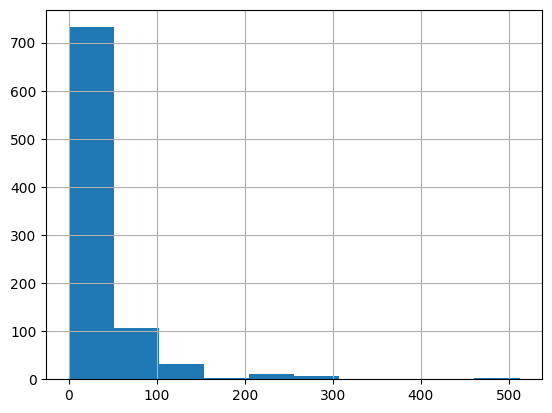

In [15]:
df['Fare'].hist();

In [16]:
df['LogFare']=np.log(df['Fare']+1)

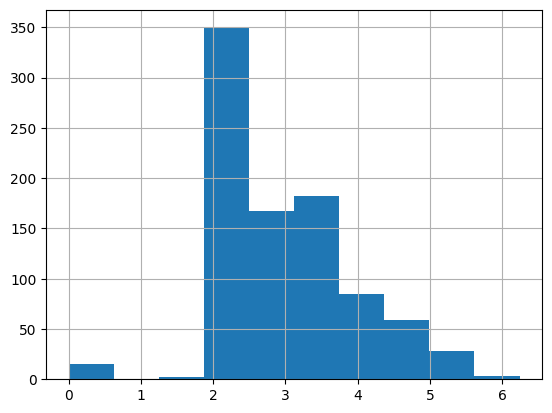

In [17]:
df['LogFare'].hist();

In [18]:
pclasses=sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [19]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [20]:
df=pd.get_dummies(df,columns=['Sex','Pclass','Embarked'])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [24]:
added_cols=['Sex_male','Sex_female','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S']


df[added_cols] = df[added_cols].astype(int)
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,0,1,0,0,1
1,0,1,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1
3,0,1,1,0,0,0,0,1
4,1,0,0,0,1,0,0,1


In [25]:
from torch import tensor
t_dep=tensor(df.Survived)

In [26]:
indep_cols=['Age','SibSp','Parch','LogFare']+added_cols
t_indep=tensor(df[indep_cols].values,dtype=torch.float)
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [27]:
t_indep.shape

torch.Size([891, 12])

In [28]:
n_coeff=t_indep.shape[1]
coeffs=torch.rand(n_coeff)- 0.5
coeffs

tensor([-0.1910, -0.3917, -0.3043, -0.1341,  0.2844,  0.1627, -0.2405, -0.0201, -0.3335,  0.2871,  0.1966,  0.4516])

In [29]:
t_indep*coeffs

tensor([[ -4.2018,  -0.3917,  -0.0000,  -0.2829,   0.2844,   0.0000,  -0.0000,  -0.0000,  -0.3335,   0.0000,   0.0000,   0.4516],
        [ -7.2577,  -0.3917,  -0.0000,  -0.5739,   0.0000,   0.1627,  -0.2405,  -0.0000,  -0.0000,   0.2871,   0.0000,   0.0000],
        [ -4.9658,  -0.0000,  -0.0000,  -0.2935,   0.0000,   0.1627,  -0.0000,  -0.0000,  -0.3335,   0.0000,   0.0000,   0.4516],
        [ -6.6848,  -0.3917,  -0.0000,  -0.5350,   0.0000,   0.1627,  -0.2405,  -0.0000,  -0.0000,   0.0000,   0.0000,   0.4516],
        [ -6.6848,  -0.0000,  -0.0000,  -0.2953,   0.2844,   0.0000,  -0.0000,  -0.0000,  -0.3335,   0.0000,   0.0000,   0.4516],
        [ -4.5838,  -0.0000,  -0.0000,  -0.3012,   0.2844,   0.0000,  -0.0000,  -0.0000,  -0.3335,   0.0000,   0.1966,   0.0000],
        [-10.3136,  -0.0000,  -0.0000,  -0.5319,   0.2844,   0.0000,  -0.2405,  -0.0000,  -0.0000,   0.0000,   0.0000,   0.4516],
        ...,
        [ -4.7748,  -0.0000,  -0.0000,  -0.2796,   0.2844,   0.0000,  -0.0000

In [30]:
vals,indices=t_indep.max(dim=0)
t_indep=t_indep/vals

In [31]:
t_indep*coeffs

tensor([[-0.0525, -0.0490, -0.0000, -0.0453,  0.2844,  0.0000, -0.0000, -0.0000, -0.3335,  0.0000,  0.0000,  0.4516],
        [-0.0907, -0.0490, -0.0000, -0.0920,  0.0000,  0.1627, -0.2405, -0.0000, -0.0000,  0.2871,  0.0000,  0.0000],
        [-0.0621, -0.0000, -0.0000, -0.0470,  0.0000,  0.1627, -0.0000, -0.0000, -0.3335,  0.0000,  0.0000,  0.4516],
        [-0.0836, -0.0490, -0.0000, -0.0857,  0.0000,  0.1627, -0.2405, -0.0000, -0.0000,  0.0000,  0.0000,  0.4516],
        [-0.0836, -0.0000, -0.0000, -0.0473,  0.2844,  0.0000, -0.0000, -0.0000, -0.3335,  0.0000,  0.0000,  0.4516],
        [-0.0573, -0.0000, -0.0000, -0.0483,  0.2844,  0.0000, -0.0000, -0.0000, -0.3335,  0.0000,  0.1966,  0.0000],
        [-0.1289, -0.0000, -0.0000, -0.0852,  0.2844,  0.0000, -0.2405, -0.0000, -0.0000,  0.0000,  0.0000,  0.4516],
        ...,
        [-0.0597, -0.0000, -0.0000, -0.0448,  0.2844,  0.0000, -0.0000, -0.0000, -0.3335,  0.0000,  0.0000,  0.4516],
        [-0.0931, -0.0000, -0.2536, -0.0732

In [32]:
preds=(t_indep*coeffs).sum(axis=1)

In [33]:
preds[:10]

tensor([ 0.2557, -0.0224,  0.1716,  0.1555,  0.2716,  0.0419,  0.2813,  0.1336,  0.0612,  0.2734])

In [35]:
loss=torch.abs(preds-t_dep).mean()
loss

tensor(0.4753)

In [36]:
def calc_preds(coeffs,indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs,indeps,deps): return torch.abs(calc_preds(coeffs,indeps)-deps).mean()

In [37]:
coeffs.requires_grad_()

tensor([-0.1910, -0.3917, -0.3043, -0.1341,  0.2844,  0.1627, -0.2405, -0.0201, -0.3335,  0.2871,  0.1966,  0.4516], requires_grad=True)

In [38]:
loss=calc_loss(coeffs,t_indep,t_dep)
loss

tensor(0.4753, grad_fn=<MeanBackward0>)

In [39]:
loss.backward()

In [40]:
coeffs.grad

tensor([ 0.0481, -0.0233, -0.0348, -0.0132,  0.3490, -0.2559, -0.0696,  0.0112,  0.1515, -0.0382, -0.0281,  0.1594])

In [41]:
loss=calc_loss(coeffs,t_indep,t_dep)
loss.backward()
coeffs.grad

tensor([ 0.0962, -0.0466, -0.0696, -0.0264,  0.6981, -0.5118, -0.1392,  0.0224,  0.3030, -0.0763, -0.0561,  0.3187])

In [42]:
loss=calc_loss(coeffs,t_indep,t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad*0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs,t_indep,t_dep))

tensor(0.4141)


In [45]:
from fastai.data.transforms import RandomSplitter
trn_split, val_split=RandomSplitter(seed=42)(df)

In [46]:
trn_indep,val_indep=t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep= t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(713, 178)

In [47]:
def update_coeffs(coeffs,lr):
    coeffs.sub_(coeffs.grad*lr)
    coeffs.grad.zero_()

In [50]:
def one_epoch(coeffs,lr):
    loss=calc_loss(coeffs,trn_indep,trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs,lr)
    print(f"{loss:.3f}",end='; ')

In [51]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [52]:
def train_model(epochs=30,lr=0.01):
    torch.manual_seed(442)
    coeffs=init_coeffs()
    for i in range(epochs): one_epoch(coeffs,lr=lr)
    return coeffs

In [53]:
coeffs= train_model(18,lr=0.2)

0.536; 0.502; 0.477; 0.454; 0.431; 0.409; 0.388; 0.367; 0.349; 0.336; 0.330; 0.326; 0.329; 0.304; 0.314; 0.296; 0.300; 0.289; 

In [54]:
def show_coeffs(): return dict(zip(indep_cols,coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.2694),
 'SibSp': tensor(0.0901),
 'Parch': tensor(0.2359),
 'LogFare': tensor(0.0280),
 'Sex_male': tensor(-0.3990),
 'Sex_female': tensor(0.2345),
 'Pclass_1': tensor(0.7232),
 'Pclass_2': tensor(0.4112),
 'Pclass_3': tensor(0.3601),
 'Embarked_C': tensor(0.0955),
 'Embarked_Q': tensor(0.2395),
 'Embarked_S': tensor(0.2122)}

In [55]:
preds=calc_preds(coeffs,val_indep)

In [56]:
results=val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False])

In [57]:
results=val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False])

In [58]:
results.float().mean()

tensor(0.7865)

In [59]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs,val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.7865)

In [60]:
preds[:20]

tensor([ 0.8160,  0.1295, -0.0148,  0.1831,  0.1520,  0.1350,  0.7279,  0.7754,  0.3222,  0.6740,  0.0753,  0.0389,  0.2216,  0.7631,
         0.0678,  0.3997,  0.3324,  0.8278,  0.1078,  0.7126])

In [61]:
def cal_preds(coeffs,indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))
coeffs=train_model(lr=100)

0.536; 30.286; 75.690; 112.666; 75.690; 112.666; 75.690; 112.666; 75.690; 112.666; 75.690; 112.666; 75.690; 112.666; 75.690; 112.666; 75.690; 112.666; 75.690; 112.666; 75.690; 112.666; 75.690; 112.666; 75.690; 112.666; 75.690; 112.666; 75.690; 112.666; 

In [62]:
acc(coeffs)

tensor(0.4045)

In [63]:
show_coeffs()

{'Age': tensor(13.2789),
 'SibSp': tensor(1.7865),
 'Parch': tensor(2.0174),
 'LogFare': tensor(16.2691),
 'Sex_male': tensor(32.2753),
 'Sex_female': tensor(6.1369),
 'Pclass_1': tensor(5.8172),
 'Pclass_2': tensor(3.9601),
 'Pclass_3': tensor(30.2939),
 'Embarked_C': tensor(10.5005),
 'Embarked_Q': tensor(2.4543),
 'Embarked_S': tensor(26.1690)}

In [67]:
tst_df=pd.read_csv('/kaggle/input/c/titanic/test.csv')

In [68]:
tst_df['Fare']=tst_df.Fare.fillna(0)

In [76]:
tst_df.fillna(modes, inplace=True)
tst_df['LogFare'] = np.log(tst_df['Fare']+1)
tst_df = pd.get_dummies(tst_df, columns=["Sex","Pclass","Embarked"])

tst_indep = tensor(tst_df[indep_cols].values, dtype=torch.float)
tst_indep = tst_indep / vals

KeyError: "None of [Index(['Sex', 'Pclass', 'Embarked'], dtype='object')] are in the [columns]"

In [71]:
tst_df.fillna(modes, inplace=True)
tst_df['LogFare'] = np.log(tst_df['Fare']+1)
tst_df = pd.get_dummies(tst_df, columns=["Sex","Pclass","Embarked"])

tst_indep = tensor(tst_df[indep_cols].values, dtype=torch.float)
tst_indep = tst_indep / vals

KeyError: "None of [Index(['Sex', 'Pclass', 'Embarked'], dtype='object')] are in the [columns]"

In [73]:
tst_df['Survived'] = (calc_preds(tst_indep, coeffs)>0.5).int()

NameError: name 'tst_indep' is not defined

In [74]:
sub_df = tst_df[['PassengerId','Survived']]
sub_df.to_csv('sub.csv', index=False)

KeyError: "['Survived'] not in index"

In [75]:
!head sub.csv

head: cannot open 'sub.csv' for reading: No such file or directory
